In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#read data

df = pd.read_csv('./insurance_data.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#check for missing values 
def missing_values(df):
    null_v = df.isnull().sum().sort_values(ascending=False)
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    null_v = pd.concat([null_v, null_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return null_v

missing_values(df)

,Missing_Number,Missing_Percent
charges,0,0.0
region,0,0.0
smoker,0,0.0
children,0,0.0
bmi,0,0.0
sex,0,0.0
age,0,0.0


In [5]:
#check for duplicated rows

df.duplicated().sum()

1

In [6]:
#showing duplicated rows
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
#dropping the duplicated rows 
df=df.drop_duplicates(keep="first")

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#check data description
df.describe().T.style.bar()

,count,mean,std,min,25%,50%,75%,max
age,1337.000000,39.222139,14.044333,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1337.000000,30.663452,6.100468,15.960000,26.290000,30.400000,34.700000,53.130000
children,1337.000000,1.095737,1.205571,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1337.000000,13279.121487,12110.359656,1121.873900,4746.344000,9386.161300,16657.717450,63770.428010


In [11]:
#locating row that has the max price 
df.loc[df['charges'] == 63770.428010]


,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [12]:
#locating row that has the max BMI
df.loc[df['bmi'] == 53.130000]

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


In [13]:
#locating row that show people who have max children of 5
df.loc[df['children'] == 5.000000]

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.600,5,no,southwest,4687.79700
71,31,male,28.500,5,no,northeast,6799.45800
166,20,female,37.000,5,no,southwest,4830.63000
413,25,male,23.900,5,no,southwest,5080.09600
425,45,male,24.310,5,no,southeast,9788.86590
438,52,female,46.750,5,no,southeast,12592.53450
568,49,female,31.900,5,no,southwest,11552.90400
640,33,male,42.400,5,no,southwest,6666.24300
877,33,male,33.440,5,no,southeast,6653.78860
932,46,male,25.800,5,no,southwest,10096.97000


In [14]:
#check the correlation between charges and each of columns
df.corr()["charges"]

age         0.298308
bmi         0.198401
children    0.067389
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='count'>

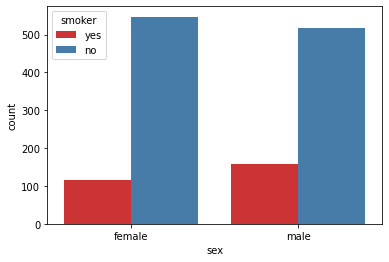

In [15]:
#analysis sex vs smoker columns combinely 
sns.countplot(df["sex"],hue=df["smoker"],palette="Set1")

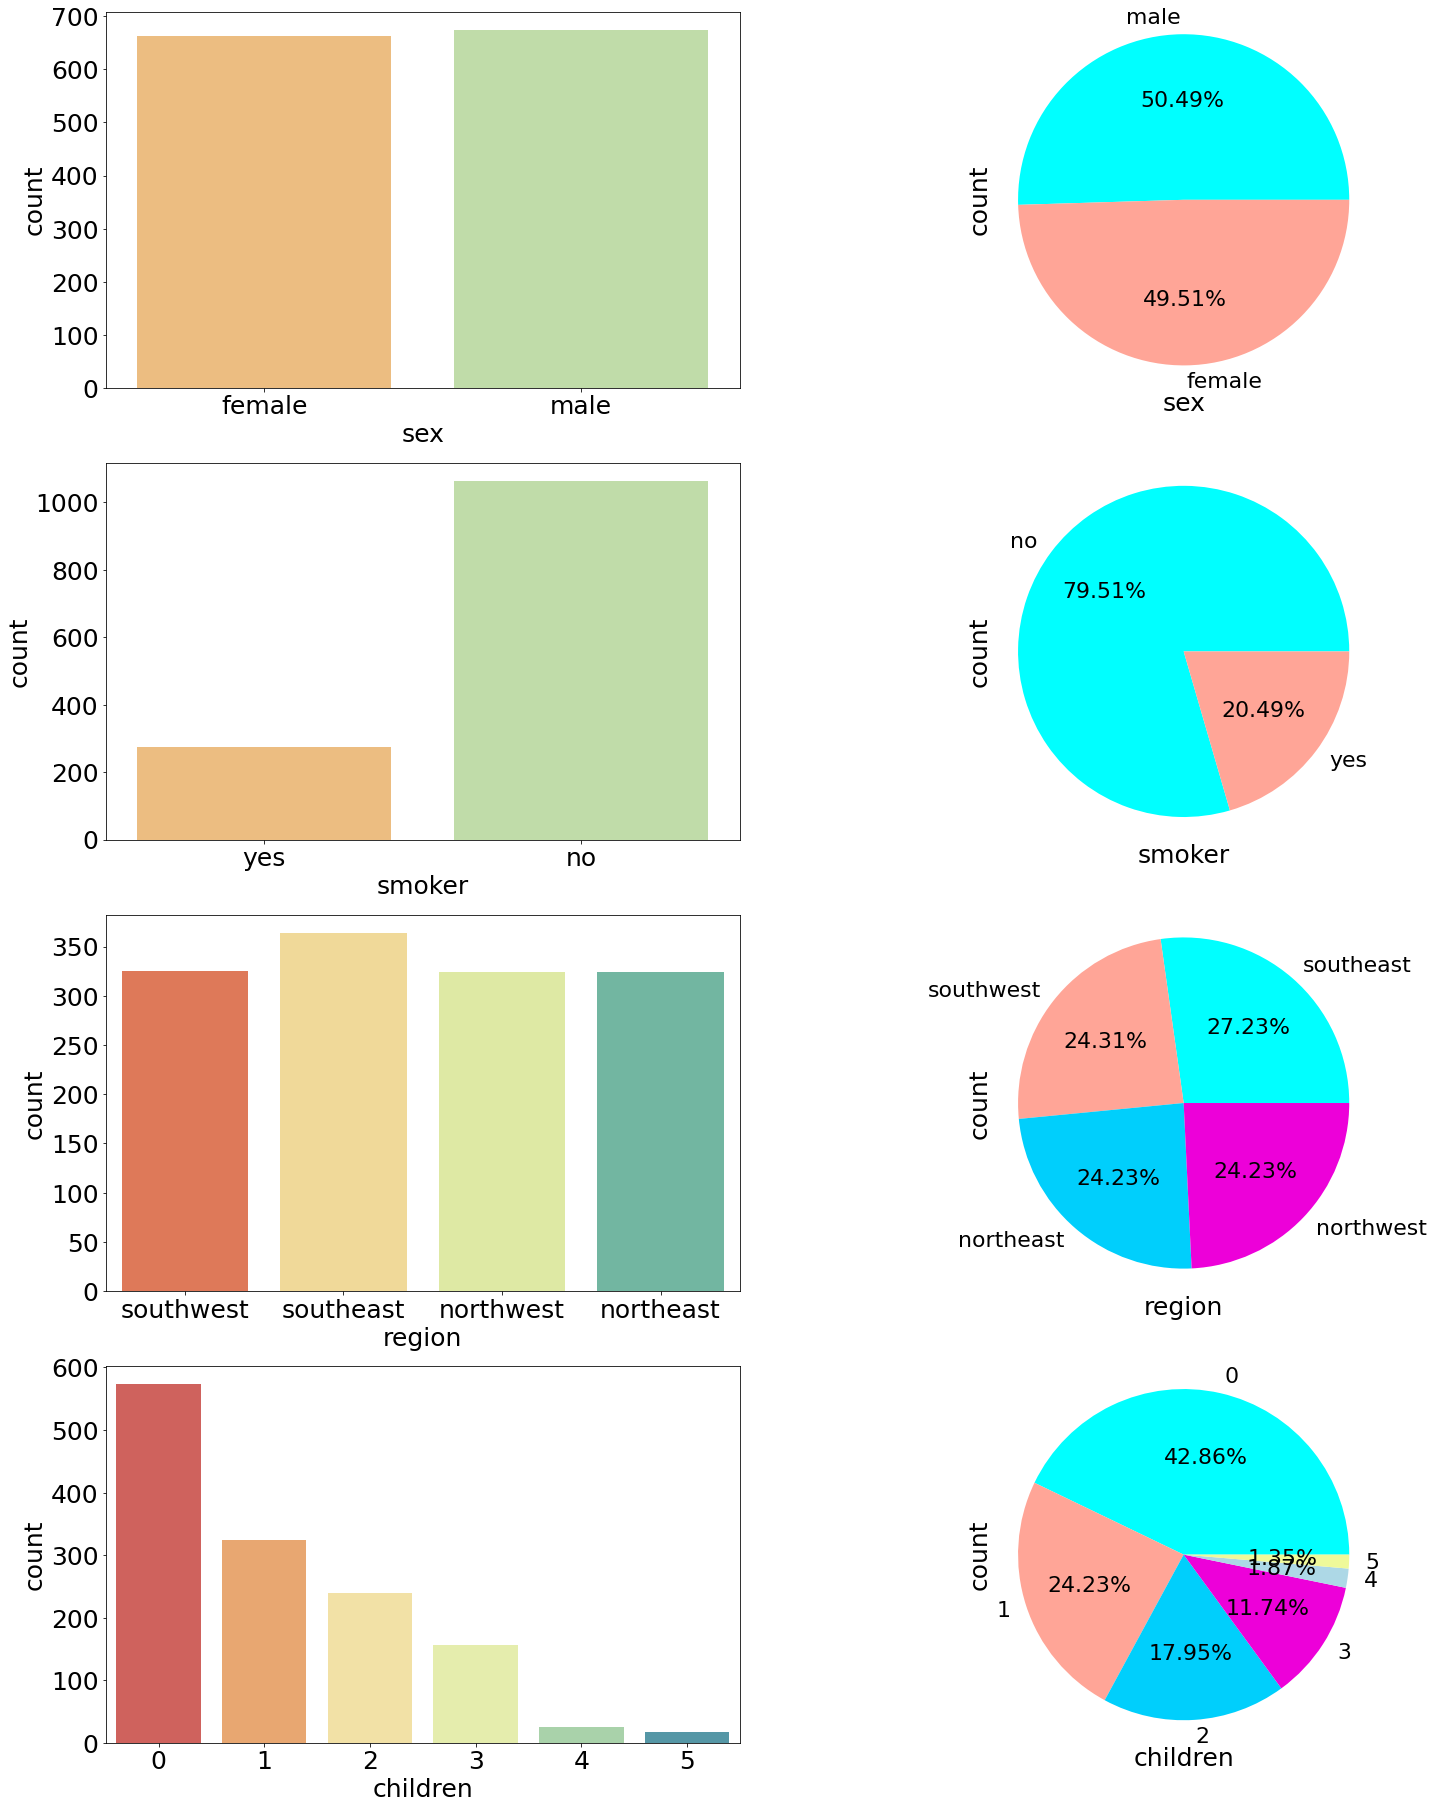

In [16]:
#plotting data for visualization

catergoy_column=["sex","smoker","region","children"]

colors=["#00FFFF","#FFA597","#00CFFC","#ED00D9","#ADD8E6","#EFF999"]
textprops = {"fontsize":22}

plt.figure(figsize=(25,90))
i=1
for column in catergoy_column:
    plt.subplot(11,2,i)
    sns.countplot(data=df,x=column,palette="Spectral")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(column,fontsize=25)
    plt.ylabel("count",fontsize=25)
    i=i+1
    plt.subplot(11,2,i)
    df[column].value_counts().plot(kind="pie",autopct="%.2f%%",colors=colors,textprops=textprops,radius = 1.1)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(column,fontsize=25)
    plt.ylabel("count",fontsize=25)
    i=i+1

plt.show()

<AxesSubplot:xlabel='charges', ylabel='Density'>

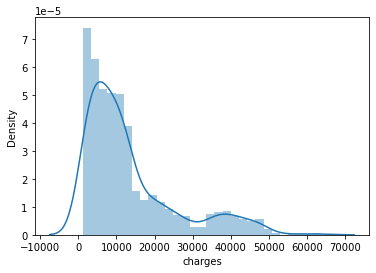

In [17]:
#Check for distribution of charges
sns.distplot(df['charges'])



In [18]:
q = df['charges'].quantile(0.99)

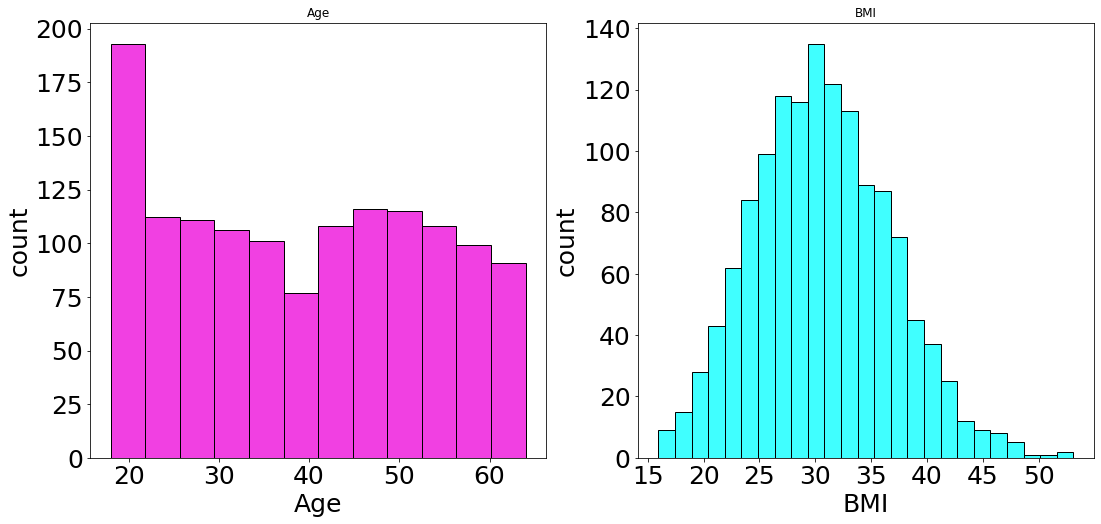

In [19]:
#analysis age and bmi columns
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.histplot(df["age"],color="#ED00D9",fill=True)
plt.title("Age")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Age",fontsize=25)
plt.ylabel("count",fontsize=25)
    

plt.subplot(122)
sns.histplot(df["bmi"],color="#00FFFF")
plt.title("BMI")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("BMI",fontsize=25)
plt.ylabel("count",fontsize=25)
   

plt.show()

<AxesSubplot:xlabel='age'>

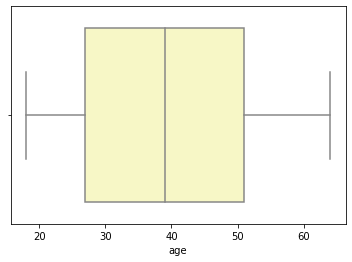

In [20]:
#checking for outliers in age col

sns.boxplot(df["age"],palette="Spectral")
            
#NO outliers in AGE
            

<AxesSubplot:xlabel='bmi'>

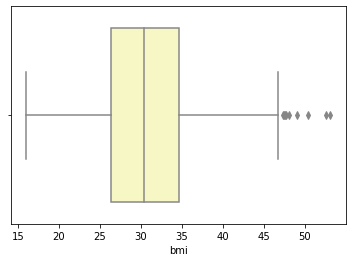

In [21]:
#outliers in bmi col...
sns.boxplot(df["bmi"],palette="Spectral")
           
           
#There are outliers in BMI

#Outliers increase the variability in your data, which decreases statistical power. 

<AxesSubplot:xlabel='bmi', ylabel='Density'>

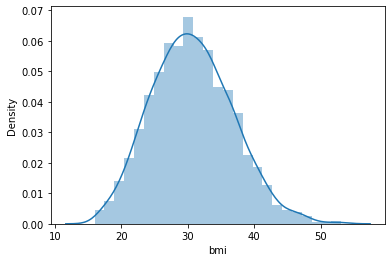

In [22]:
#Check for distribution of BMI
sns.distplot(df['bmi'])

In [23]:
#REMOVING OUTLIERS TO TRAIN DATA



def outlier(data):

    mean=data.mean()
    std=data.std()
    mini=data.min()
    maxi=data.max()

    #let find the boundaries for outlier
    highest=data.mean() + 3*data.std()
    lowest=data.mean() - 3*data.std()

        #finally, let find the outlier
    outliers=df[(data>highest) | (data<lowest)]
        

    return outliers
#outliers detection and remove  
new=pd.DataFrame(df["bmi"],columns=["bmi"])
for col in new.columns:
    test=outlier(df[col])
    print("columns name :",col)
    print("numbers of outliers:",len(test))
    print("\n")
    print(test)
    print("<<<<<<<<<------------------------------------->>>>>>>>>")
    
#drop the outliers by thier index    
    df=df.drop(test.index,axis=0)                        

columns name : bmi
numbers of outliers: 4


      age   sex    bmi  children smoker     region     charges
116    58  male  49.06         0     no  southeast  11381.3254
847    23  male  50.38         1     no  southeast   2438.0552
1047   22  male  52.58         1    yes  southeast  44501.3982
1317   18  male  53.13         0     no  southeast   1163.4627
<<<<<<<<<------------------------------------->>>>>>>>>


In [24]:
# CHANGE BMI to a Catogory for data training

#function that will change  bmi to a category
def weightCondition(bmi):
  if bmi<18.5:
    return "Underweight"
  elif (bmi>= 18.5)&(bmi< 24.986):
    return "Normal"
  elif (bmi >= 25) & (bmi < 29.926):
    return "Overweight"
  else:
    return "Obese"
df["weight_Condition"]=[weightCondition(val) for val in df["bmi"] ]
df.head(5)

,age,sex,bmi,children,smoker,region,charges,weight_Condition
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [25]:
#TRAINING and SPLITING DATA

#get the features and target col
Y=df.charges
X=df.drop(["charges"],axis=1)
#train test split  
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)


X_train shape:  (1066, 7)
X_test shape:  (267, 7)

Y_train shape:  (1066,)
Y_test shape:  (267,)


In [26]:
x_train.head()

,age,sex,bmi,children,smoker,region,weight_Condition
1284,61,male,36.30,1,yes,southwest,Obese
1114,23,male,24.51,0,no,northeast,Normal
969,39,female,34.32,5,no,southeast,Obese
600,18,female,39.16,0,no,southeast,Obese
171,49,male,30.30,0,no,southwest,Obese


In [27]:
y_train.head()

1284    47403.8800
1114     2396.0959
969      8596.8278
600      1633.0444
171      8116.6800
Name: charges, dtype: float64

In [28]:
#Checking for types of Weight Condition
x_train["weight_Condition"].unique()

array(['Obese', 'Normal', 'Overweight', 'Underweight'], dtype=object)

In [29]:
#Machine learning algorithms cannot work with categorical data directly.

#Categorical data must be converted to numbers.

#pipe1 contain 2 encoder ,one hot encoder and ordinal encoder
#one hot encoder includes sex,smoker,region, weight_condition
#ordinal encode the weight_condition col because we arrange the order on this col
#pipe2 just scale all the columns 
pipe1=ColumnTransformer(transformers=[("OHE",OneHotEncoder(sparse=False,drop="first"),
                                       ["sex","smoker","region"]),
                                     ("ordinal",OrdinalEncoder(categories=[['Underweight','Normal','Overweight','Obese']]),
                                      ["weight_Condition"])]
                        ,remainder="passthrough")
pipe2=ColumnTransformer(transformers=[("scaling",StandardScaler(),[0,1,2,3,4,5,6,7,8])],
                        remainder="passthrough")

pipe=Pipeline([("pipe1",pipe1),("pipe2",pipe2)])
x_train=pd.DataFrame(pipe.fit_transform(x_train))
x_test=pd.DataFrame(pipe.transform(x_test))
x_train.head()

,0,1,2,3,4,5,6,7,8
0,0.979571,1.995322,-0.569406,-0.617113,1.751771,0.843691,1.554508,0.960143,-0.092229
1,0.979571,-0.501172,-0.569406,-0.617113,-0.570851,-1.647651,-1.154812,-1.019125,-0.918415
2,-1.020855,-0.501172,-0.569406,1.620448,-0.570851,0.843691,-0.014046,0.627747,3.212513
3,-1.020855,-0.501172,-0.569406,1.620448,-0.570851,0.843691,-1.511301,1.440271,-0.918415
4,0.979571,-0.501172,-0.569406,-0.617113,1.751771,0.843691,0.698933,-0.047118,-0.918415


In [30]:
#TRAIN THE DATA USING LINEAR REGRESSION

#this function used to evalute the models with features and target.
def models_score(models, x_train, x_test, y_train, y_test):    
    
    scores = {}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred=model.predict(x_test) 
        scores[name] =r2_score(y_test,y_pred)
    
           
   
    model_scores = pd.DataFrame(scores, index=['R2 Score']).transpose()
    model_scores = model_scores.sort_values('R2 Score',ascending=False)
    return model_scores

In [33]:
#initialize the models 
models = {"LinearRegression":LinearRegression(),"DecisionTreeRegressor":DecisionTreeRegressor()}

In [34]:
#Calling the function
model_scores = models_score(models, x_train, x_test, y_train, y_test)

model_scores

# In generally, a higher r-squared indicates a better fit for the model.


,R2 Score
LinearRegression,0.762402
DecisionTreeRegressor,0.745138
